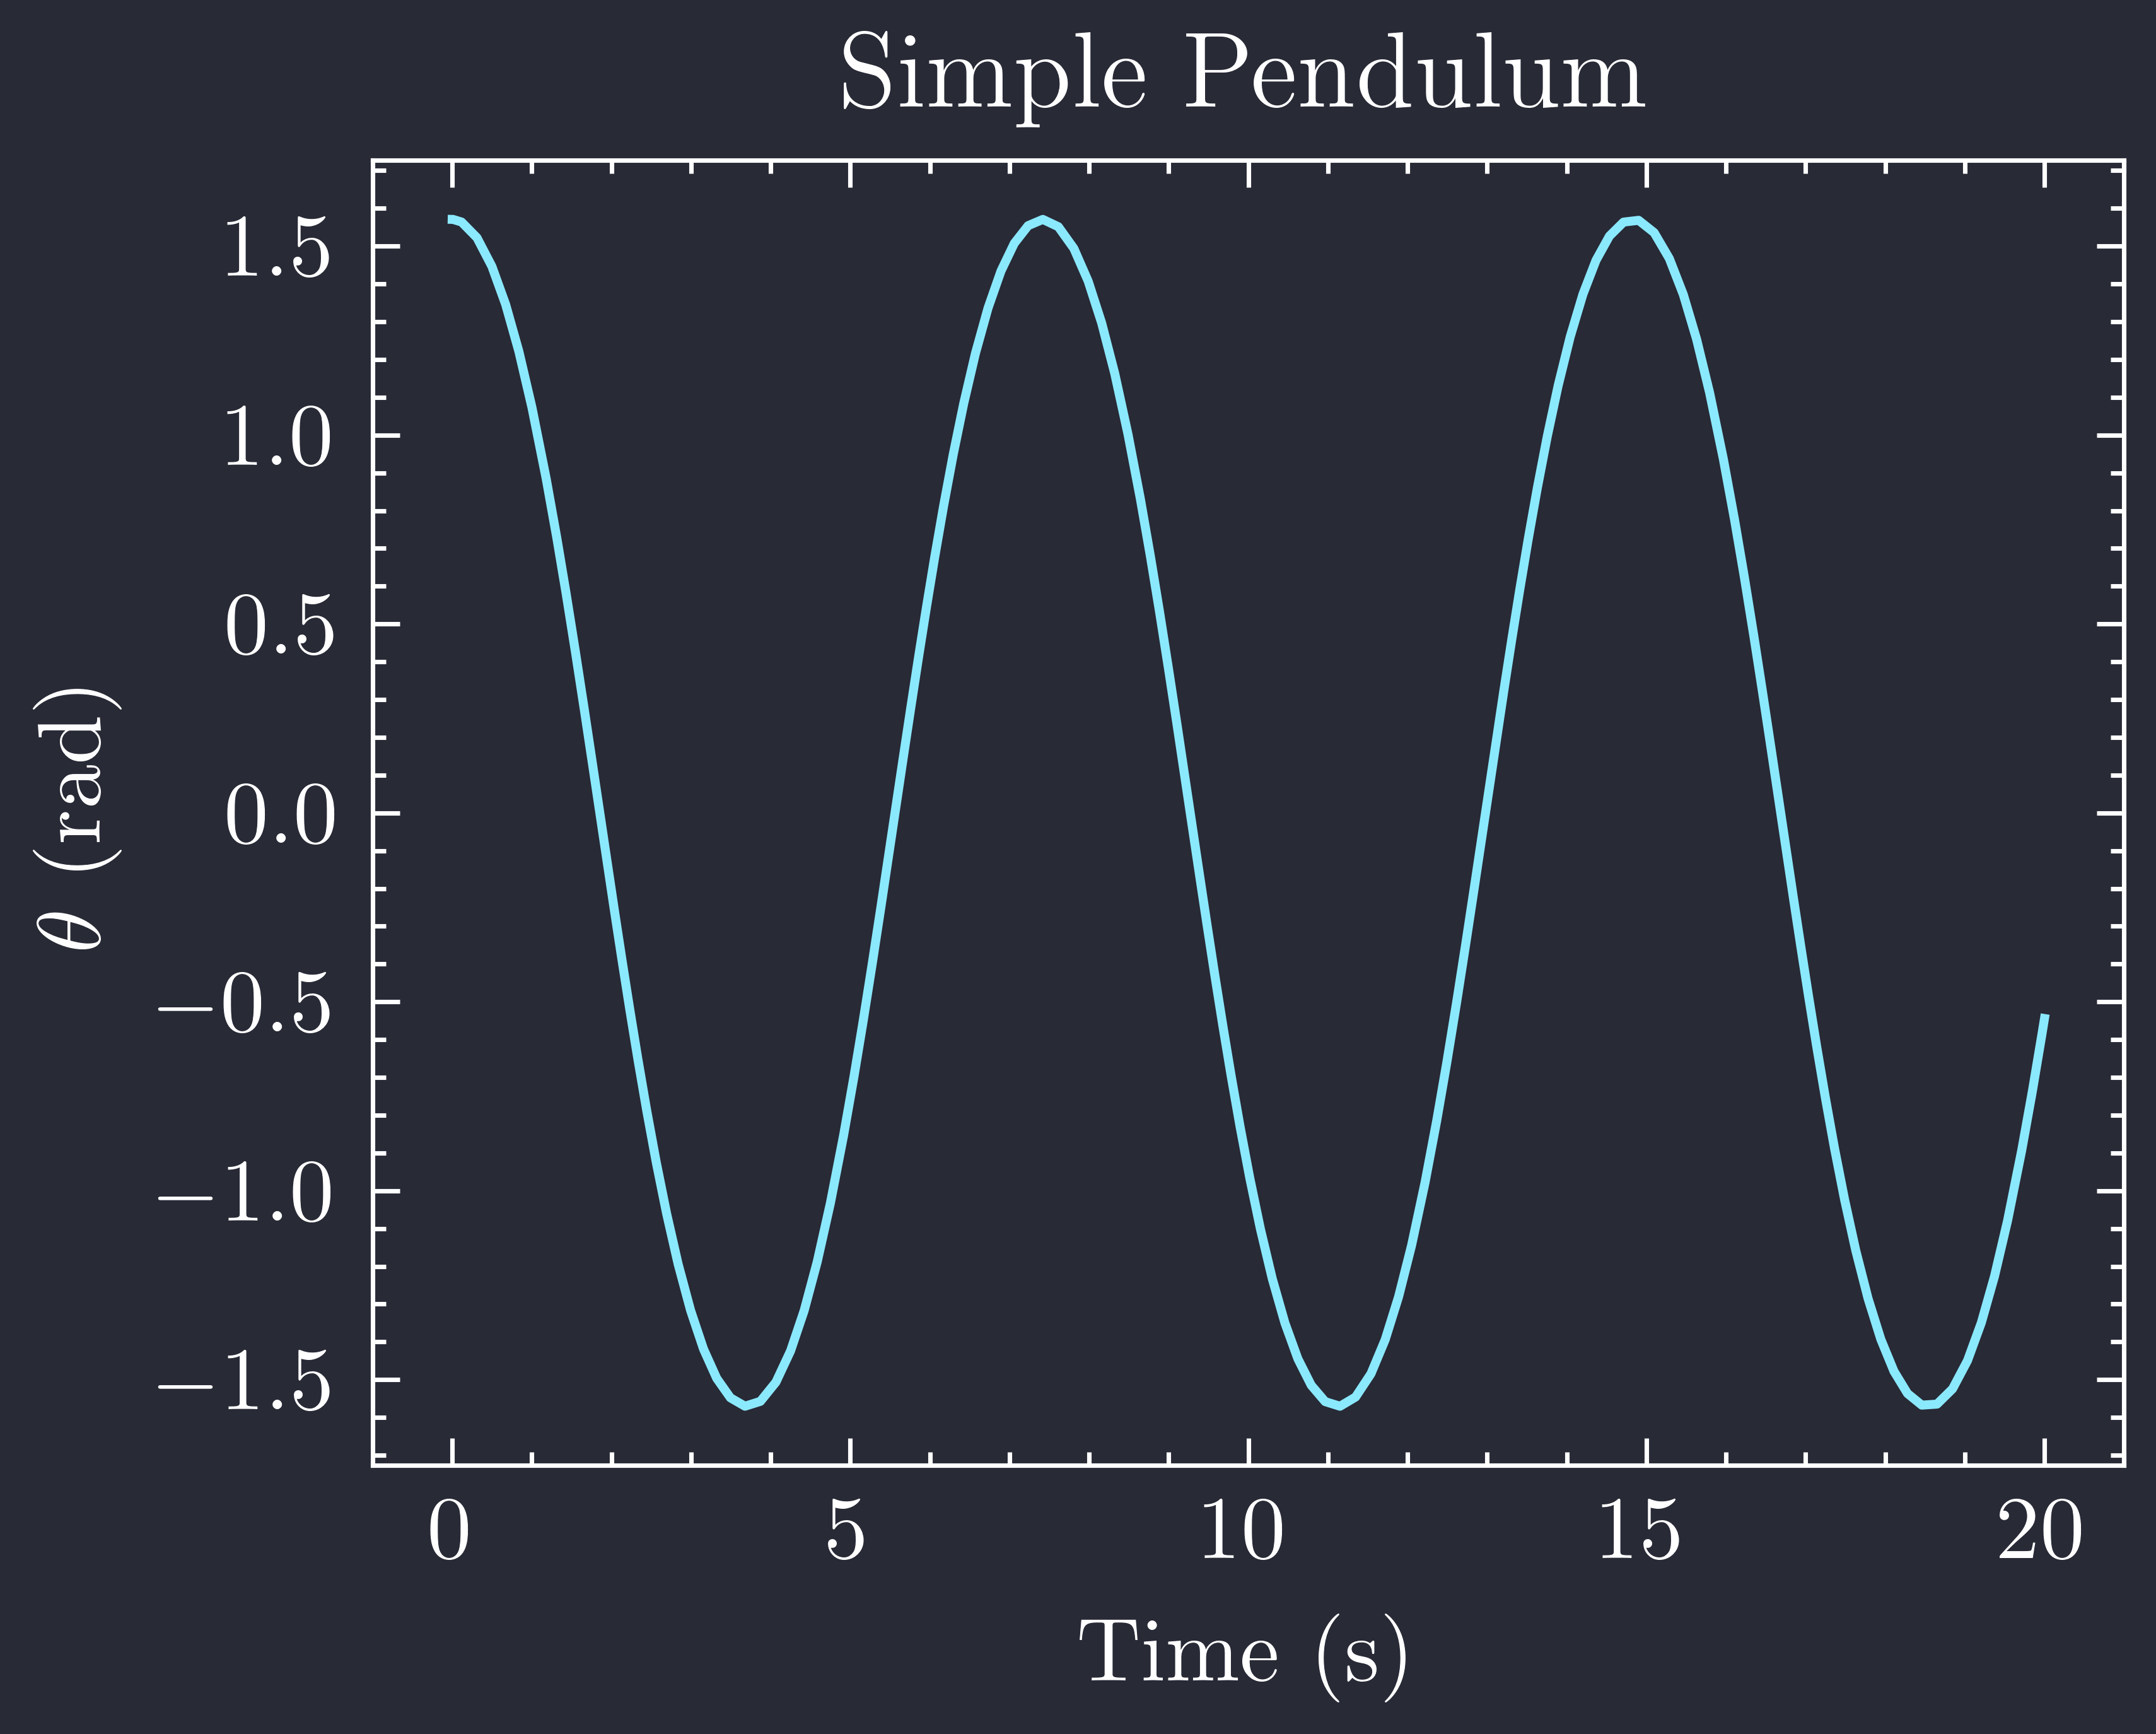

In [202]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

# Science plot package + Dracula theme
plt.style.use(['science', 'dark_background'])
plt.rcParams['axes.facecolor'] = '#282a36'
plt.rcParams['figure.facecolor'] = '#282a36'
colorcycle = ['#8be9fd', '#ff79c6', '#50fa7b', '#bd93f9', '#ffb86c', '#ff5555', '#f1fa8c', 
'#6272a4']
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=colorcycle)
white = '#f8f8f2' # foreground

# change dpi
plt.rcParams['figure.dpi'] = 1024

# import solve_ivp
from scipy.integrate import solve_ivp

# Question 1
# define constant
g_over_L = 1.0
time = [0, 20]

# define function
def rhs(t, y):
    return [y[1], -g_over_L * np.sin(y[0])]

# define initial condition
y0 = [np.pi / 2, 0]

# Solving the ODE
sol = solve_ivp(rhs, time, y0, atol=1e-8, rtol=1e-8)

# Plotting the solution
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time (s)')
plt.ylabel(rf'$\theta$ (rad)')
plt.title('Simple Pendulum')
plt.show()

[0.1571 0.3142 1.5708 2.8274]


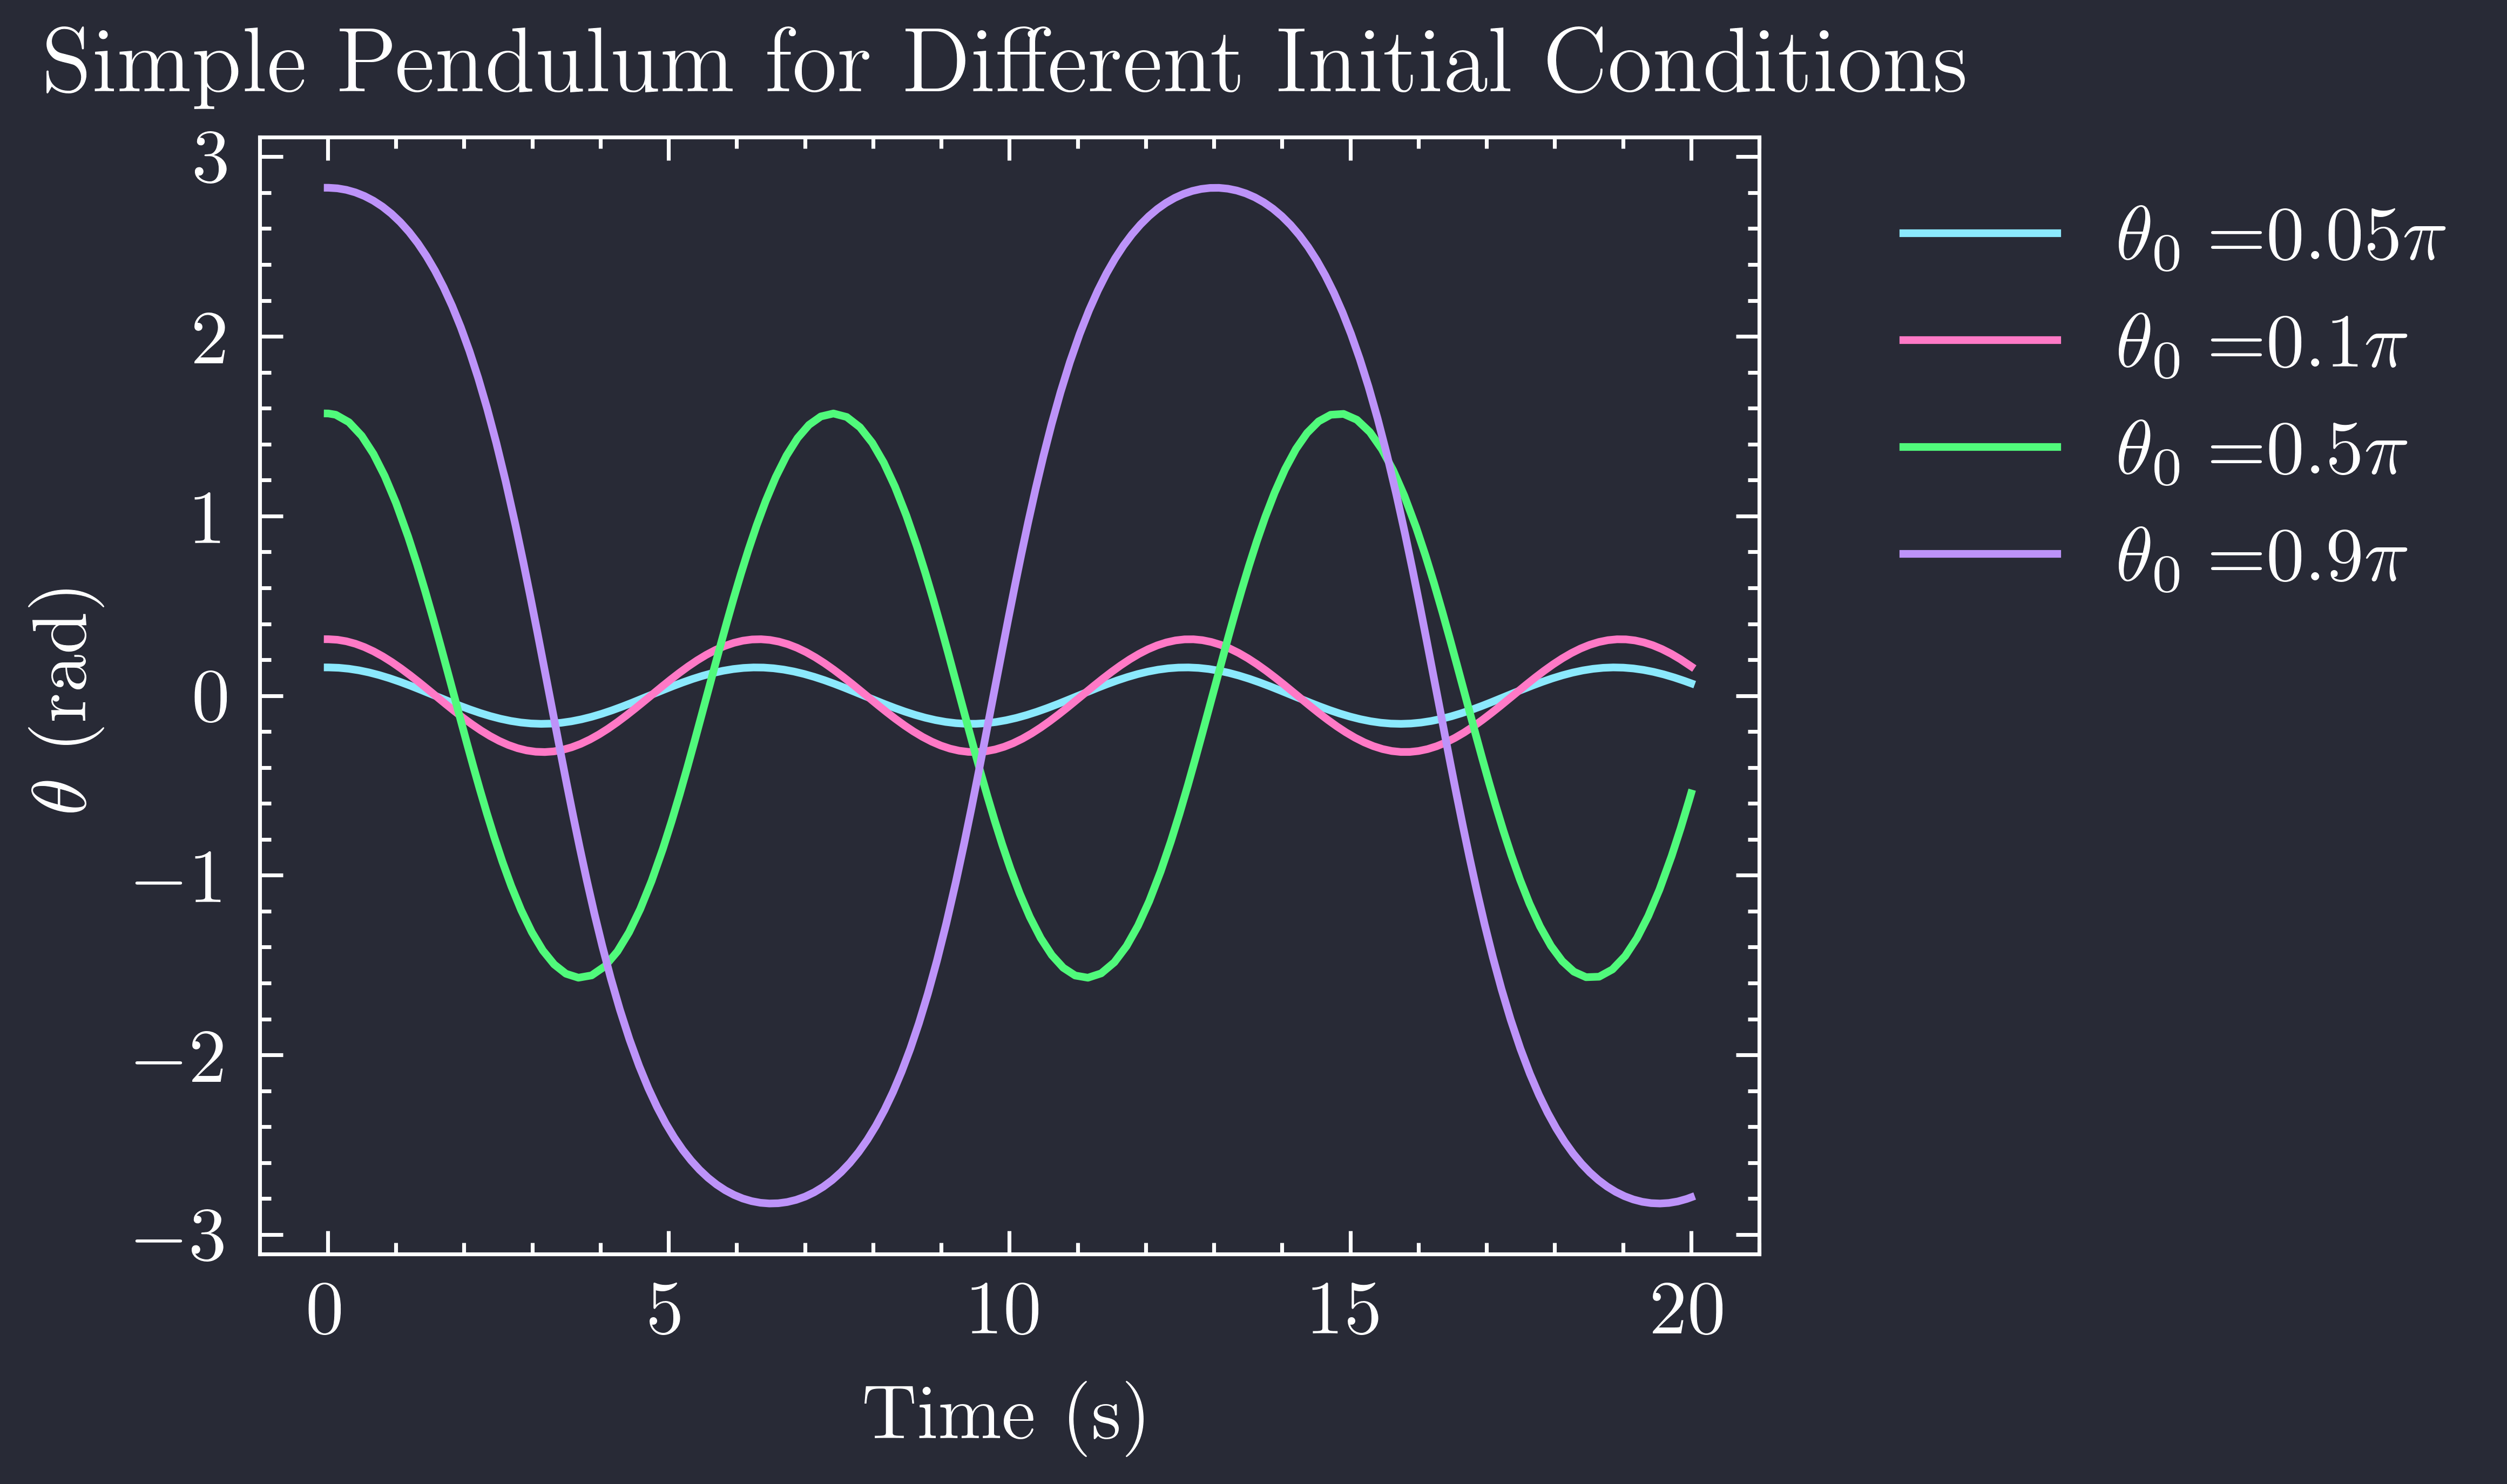

In [267]:
# Initial condition for loop
num = np.array([0.05, 0.1, 0.5, 0.9])
theta_max = num * np.pi
print(theta_max)

# Looping over initial conditions
for i, theta in enumerate(theta_max):
    y0 = [theta, 0]
    sol = solve_ivp(rhs, time, y0, atol=1e-8, rtol=1e-8)
    plt.plot(sol.t, sol.y[0], label=rf'$\theta_0 = $' + str(num[i]) + rf'$\pi$')


plt.xlabel('Time (s)')
plt.ylabel(rf'$\theta$ (rad)')
plt.title('Simple Pendulum for Different Initial Conditions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


## Question 1

As $\theta_{\text{max}}$ increases, the amplitude obviously increases. For small oscillations we can
see that the periods are around the same, but for larger
$\theta_{\text{max}}$ we find that the period increases.

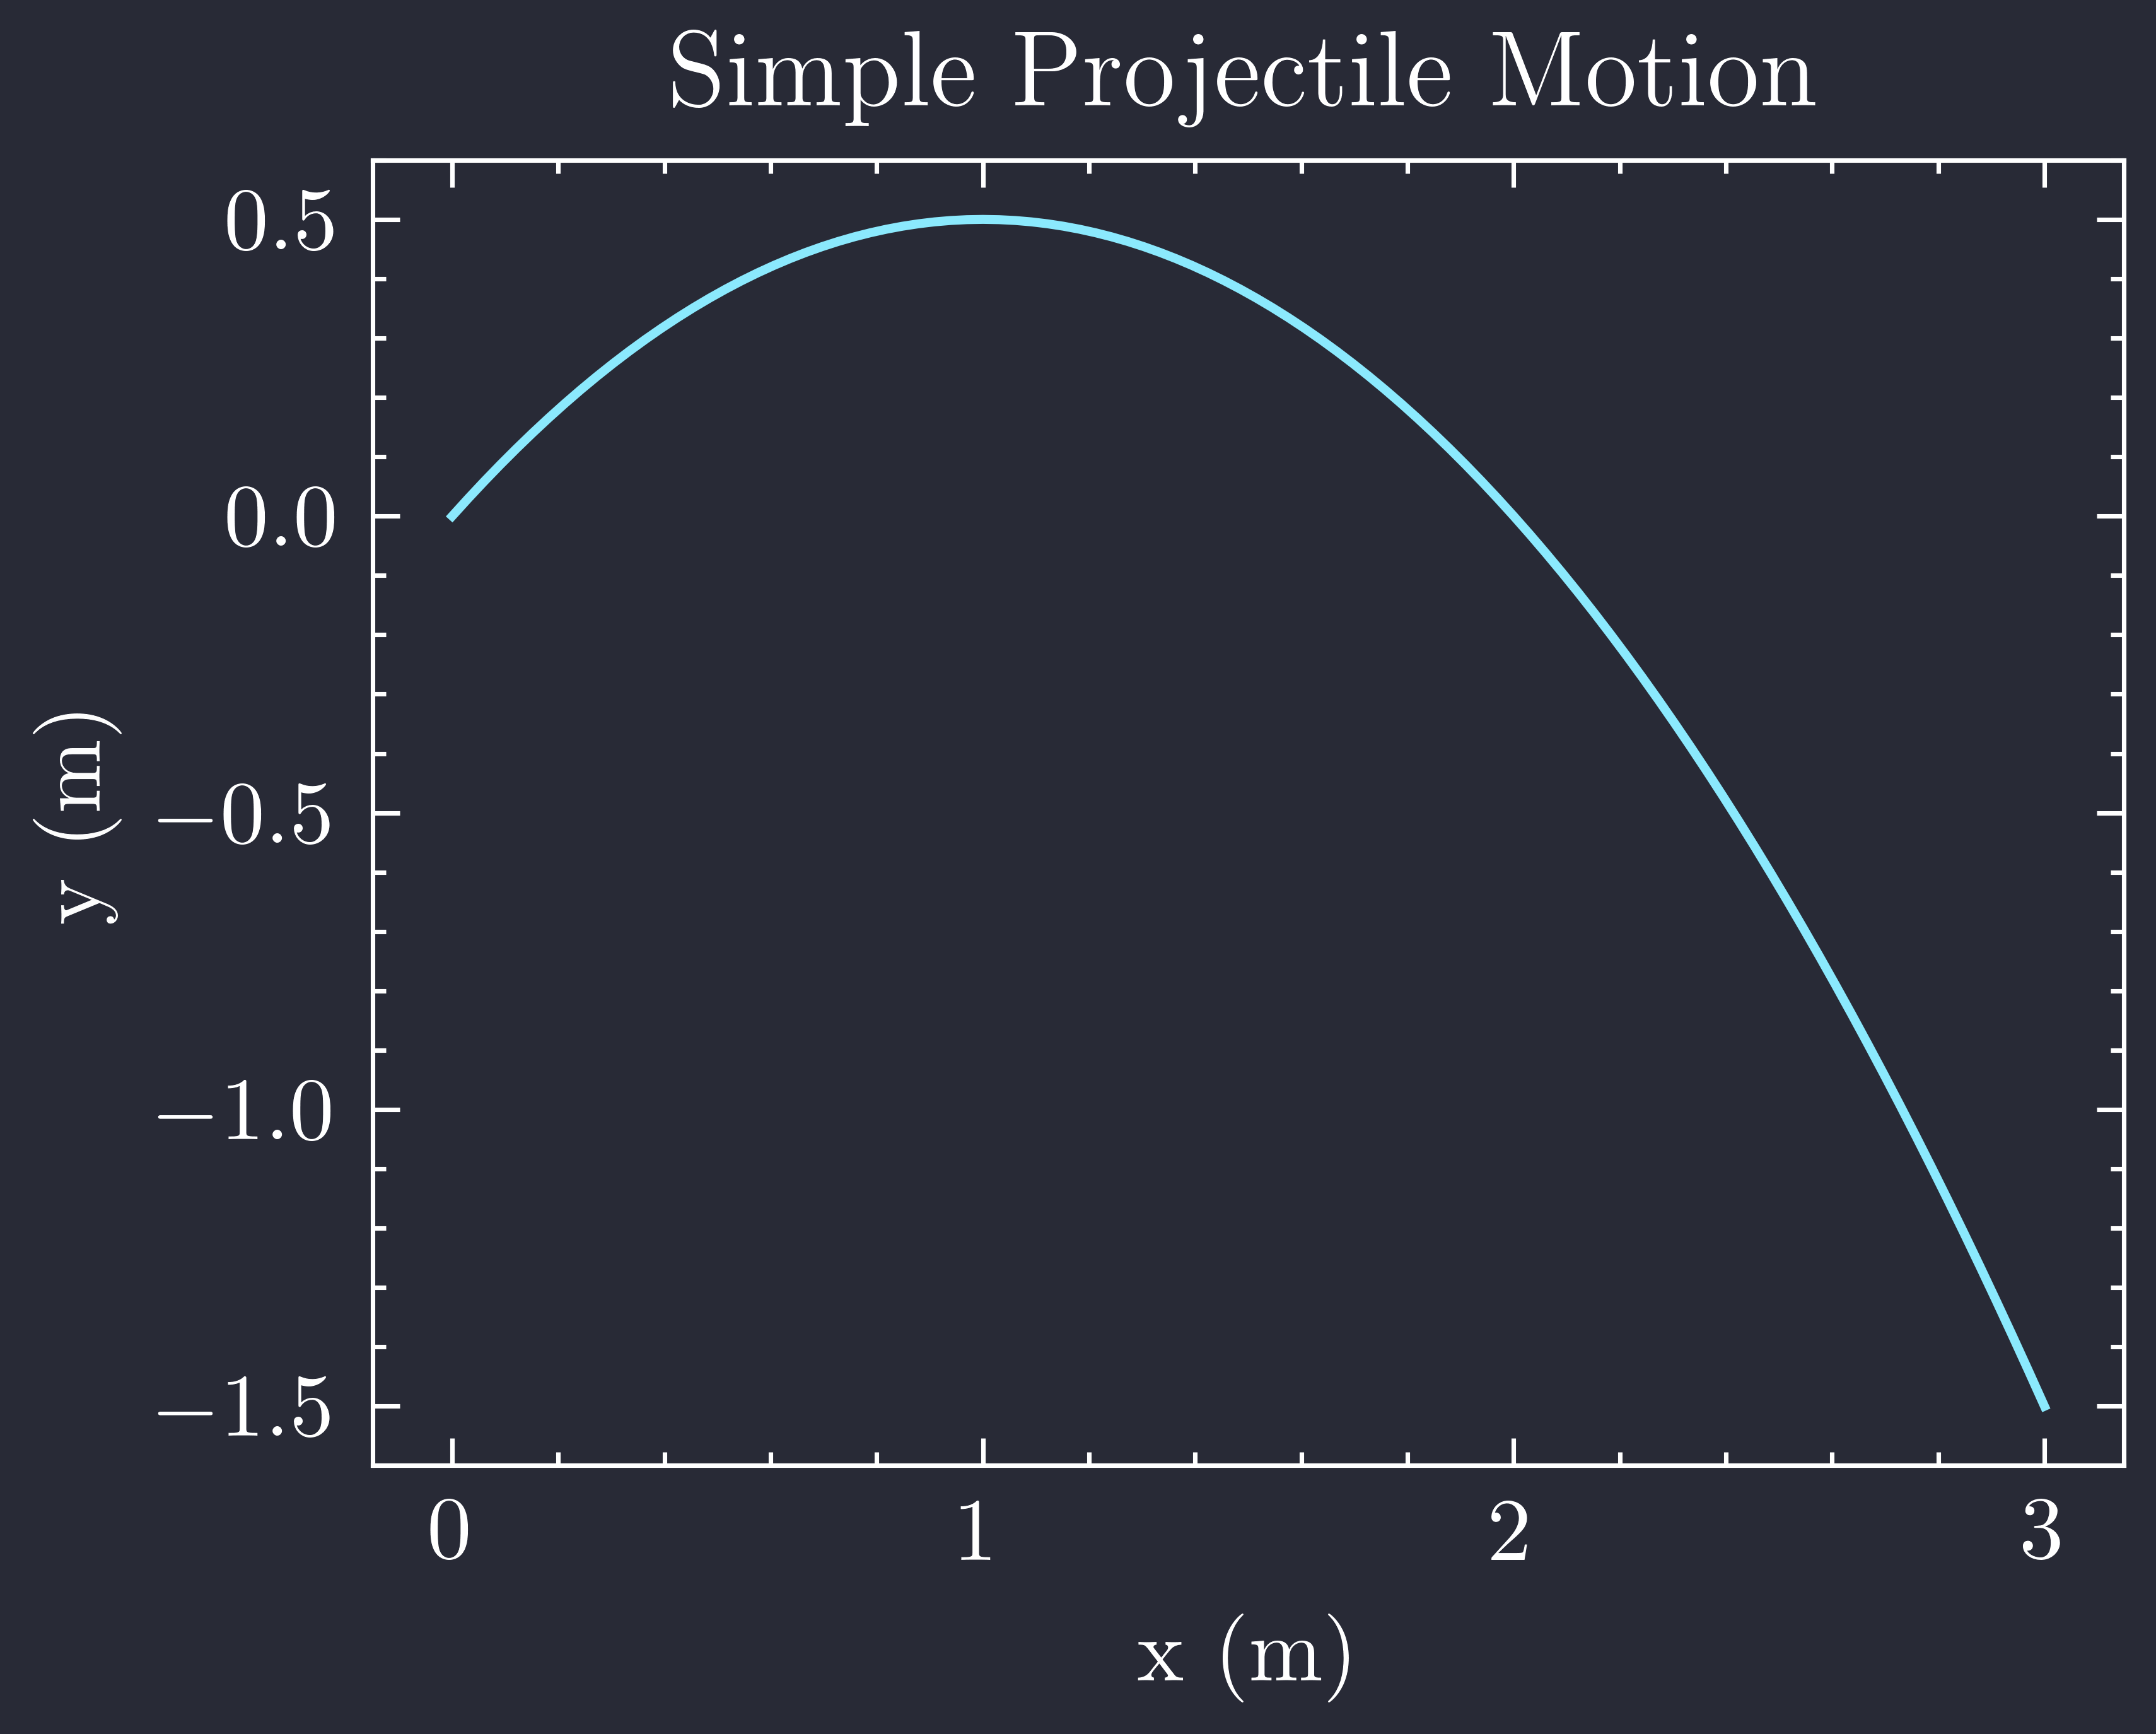

In [266]:
# Q 2
# constants
g = 1
t = np.linspace(0, 3, 100)

# (a)
def f(t, s):
    v_x = s[2]
    v_y = s[3]
    return [v_x, v_y, 0, -g]

# (b)
sol_2 = solve_ivp(f, [0, 3], [0, 0, 1, 1], t_eval=t, dense_output=True)

# plot
plt.plot(sol_2.y[0], sol_2.y[1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Simple Projectile Motion')
plt.show()

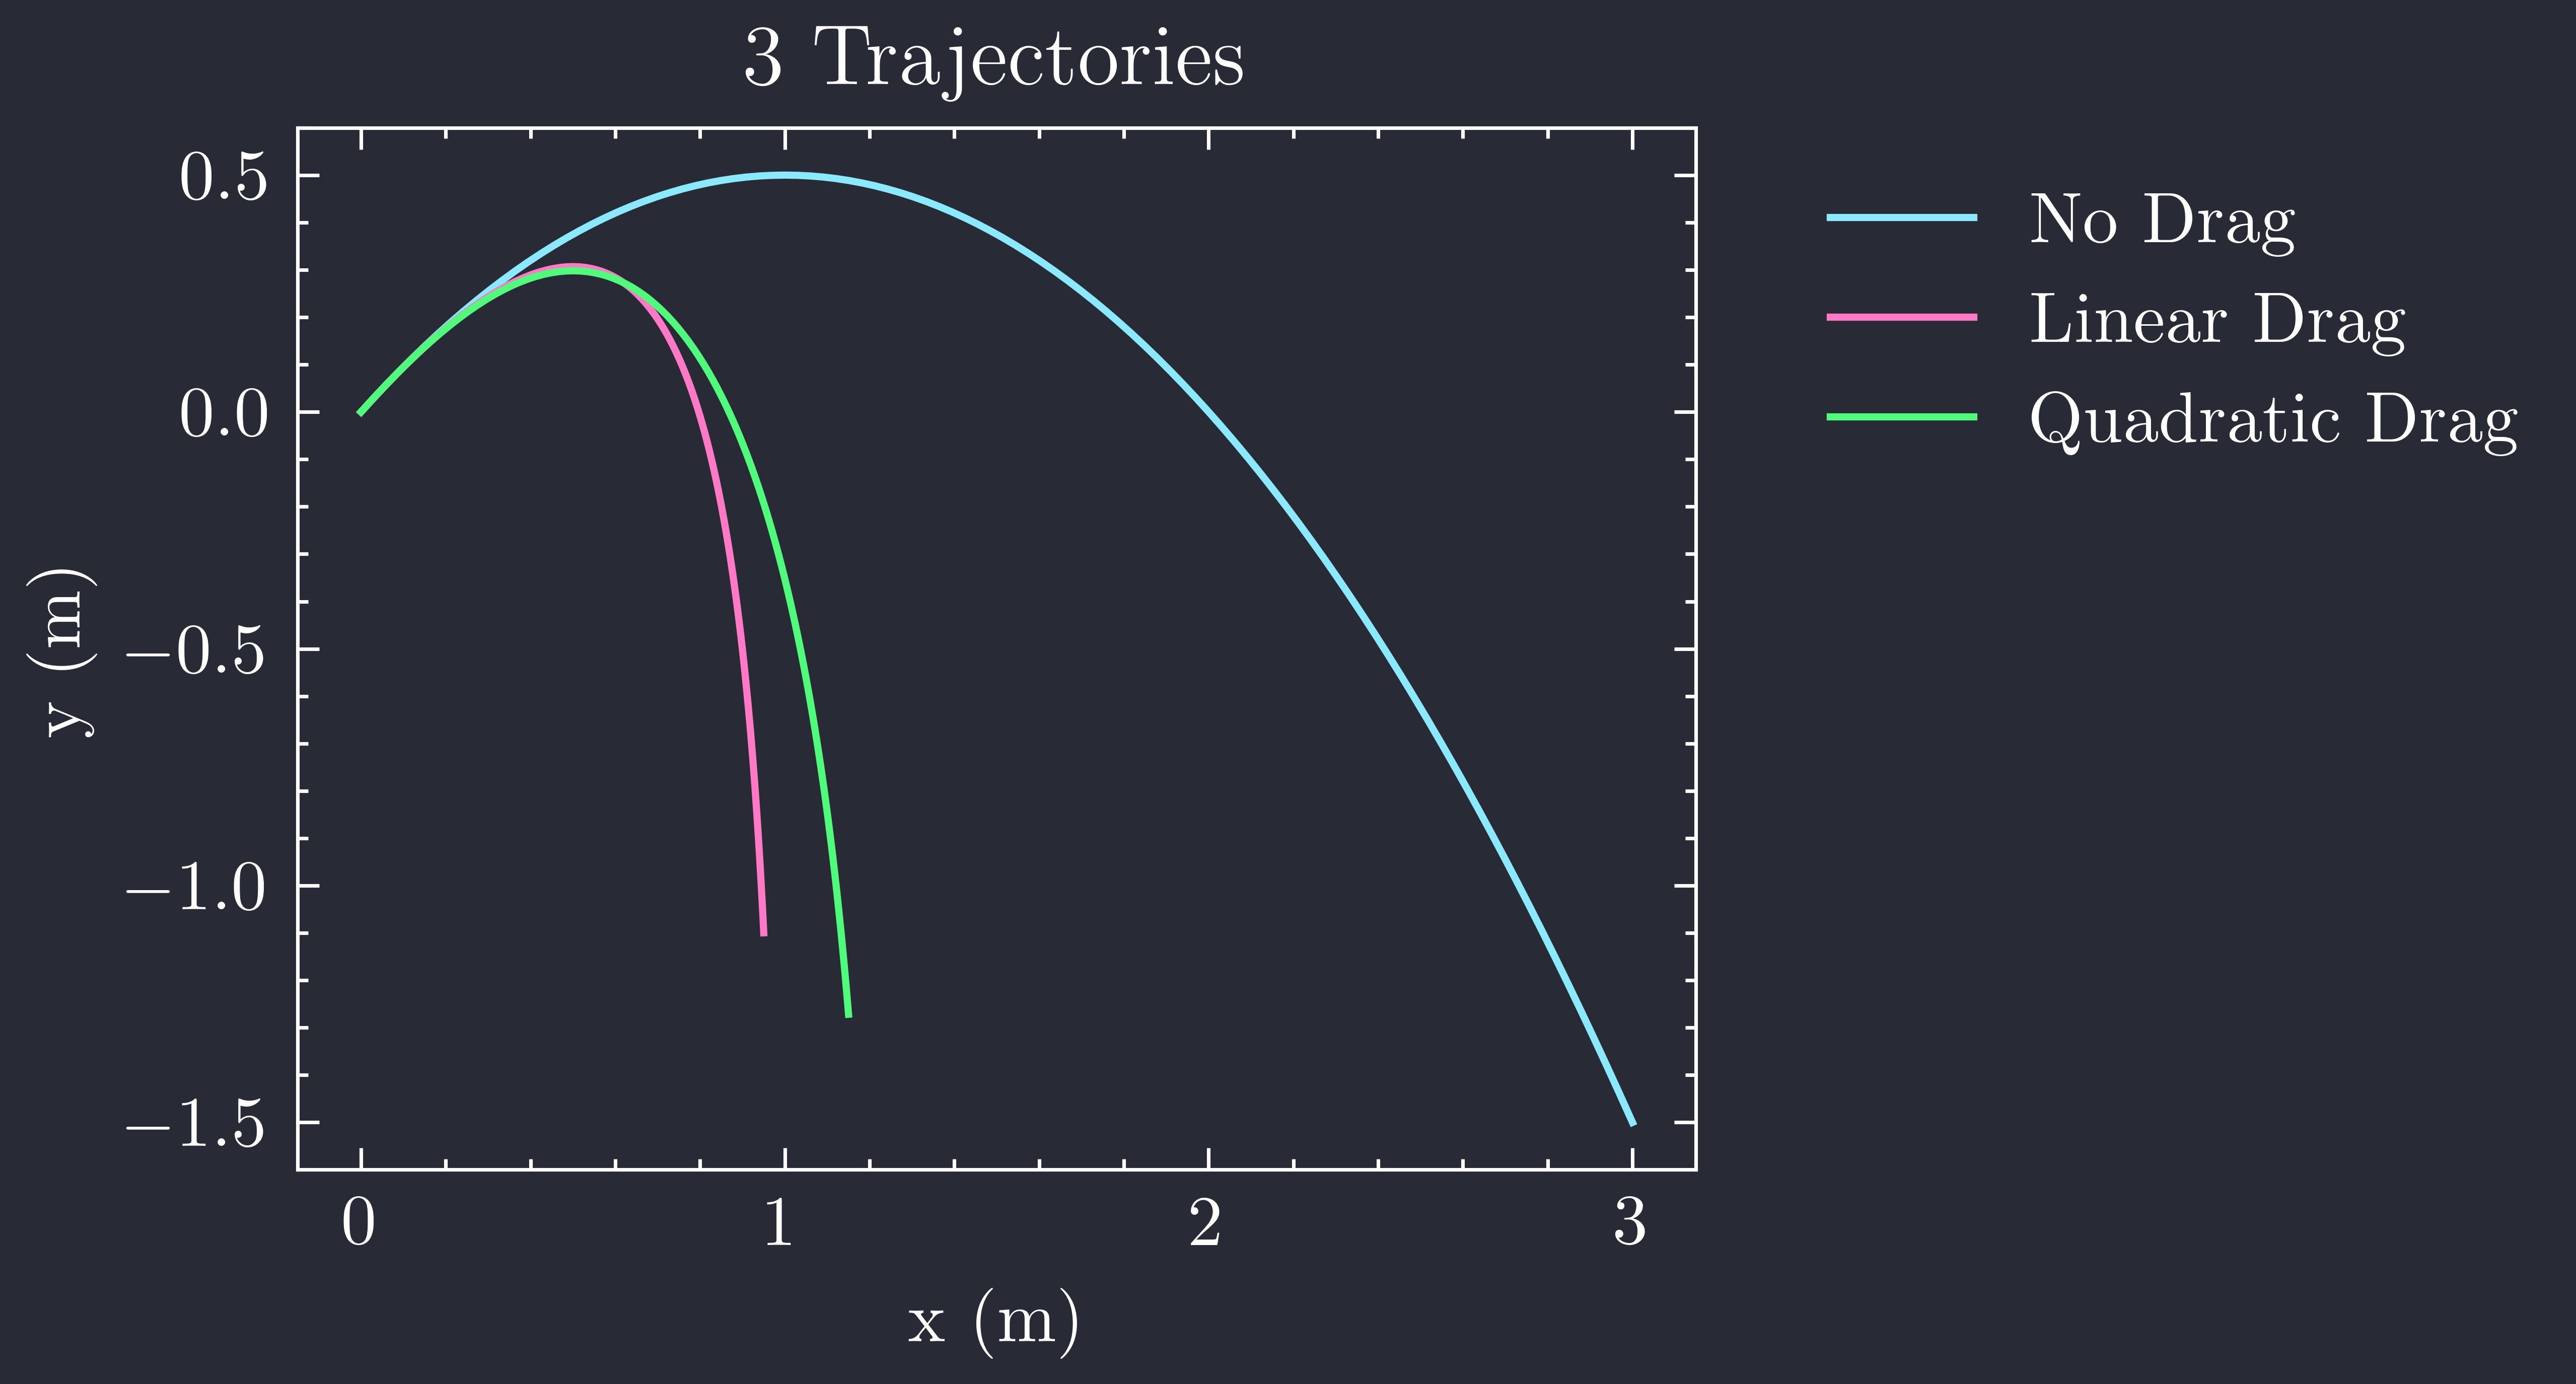

In [236]:
# (c)
# with linear air resistance
def f_l(t, s):
    v_x = s[2]
    v_y = s[3]
    dot_v_x = - b / m * v_x
    dot_v_y = - g - b / m * v_y
    return [v_x, v_y, dot_v_x, dot_v_y]

# with quadratic air resistance
def f_q(t, s):
    v_x = s[2]
    v_y = s[3]
    dot_v_x = - c / m * np.sqrt(v_x ** 2 + v_y ** 2) * v_x
    dot_v_y = - g - c / m * np.sqrt(v_x ** 2 + v_y ** 2) * v_y
    return [v_x, v_y, dot_v_x, dot_v_y]

# constants
b = c = m = 1

# (d) solve
sol_2_l = solve_ivp(f_l, [0, 3], [0, 0, 1, 1], t_eval=t, dense_output=True)
sol_2_q = solve_ivp(f_q, [0, 3], [0, 0, 1, 1], t_eval=t, dense_output=True)

# plot on the same graph
plt.plot(sol_2.y[0], sol_2.y[1], label='No Drag')
plt.plot(sol_2_l.y[0], sol_2_l.y[1], label='Linear Drag')
plt.plot(sol_2_q.y[0], sol_2_q.y[1], label='Quadratic Drag')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('3 Trajectories')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Question 2

We can see that the trajectory of the projectile without any air resistance follows a paraoblic
path. But for both types of air resistance, the trajectory is not parabolic and cover less distance
than the projectile without air resistance. Now, according to the figure above, we see that the 
solution with **linear air resistance** covers the shortest $x$ distance. 

This is unexpected but completely plausible because when we look at the vertical component of
the drag force(the horizontal component does not change), we see for small velocities that vertical
component of the drag force in the quadratic term is smaller than the linear term $v_y^2 < v_y$. We
can also compare the magnitude of the drag force and see that the linear term is larger than the
quadratic term for a longer period of time as shown in the figure below (almost 2 seconds). For
*larger velocities*, we would expect the quadratic term to be larger than the linear term, and
therefore the projectile with *quadratic air resistance* would cover the shortest distance.

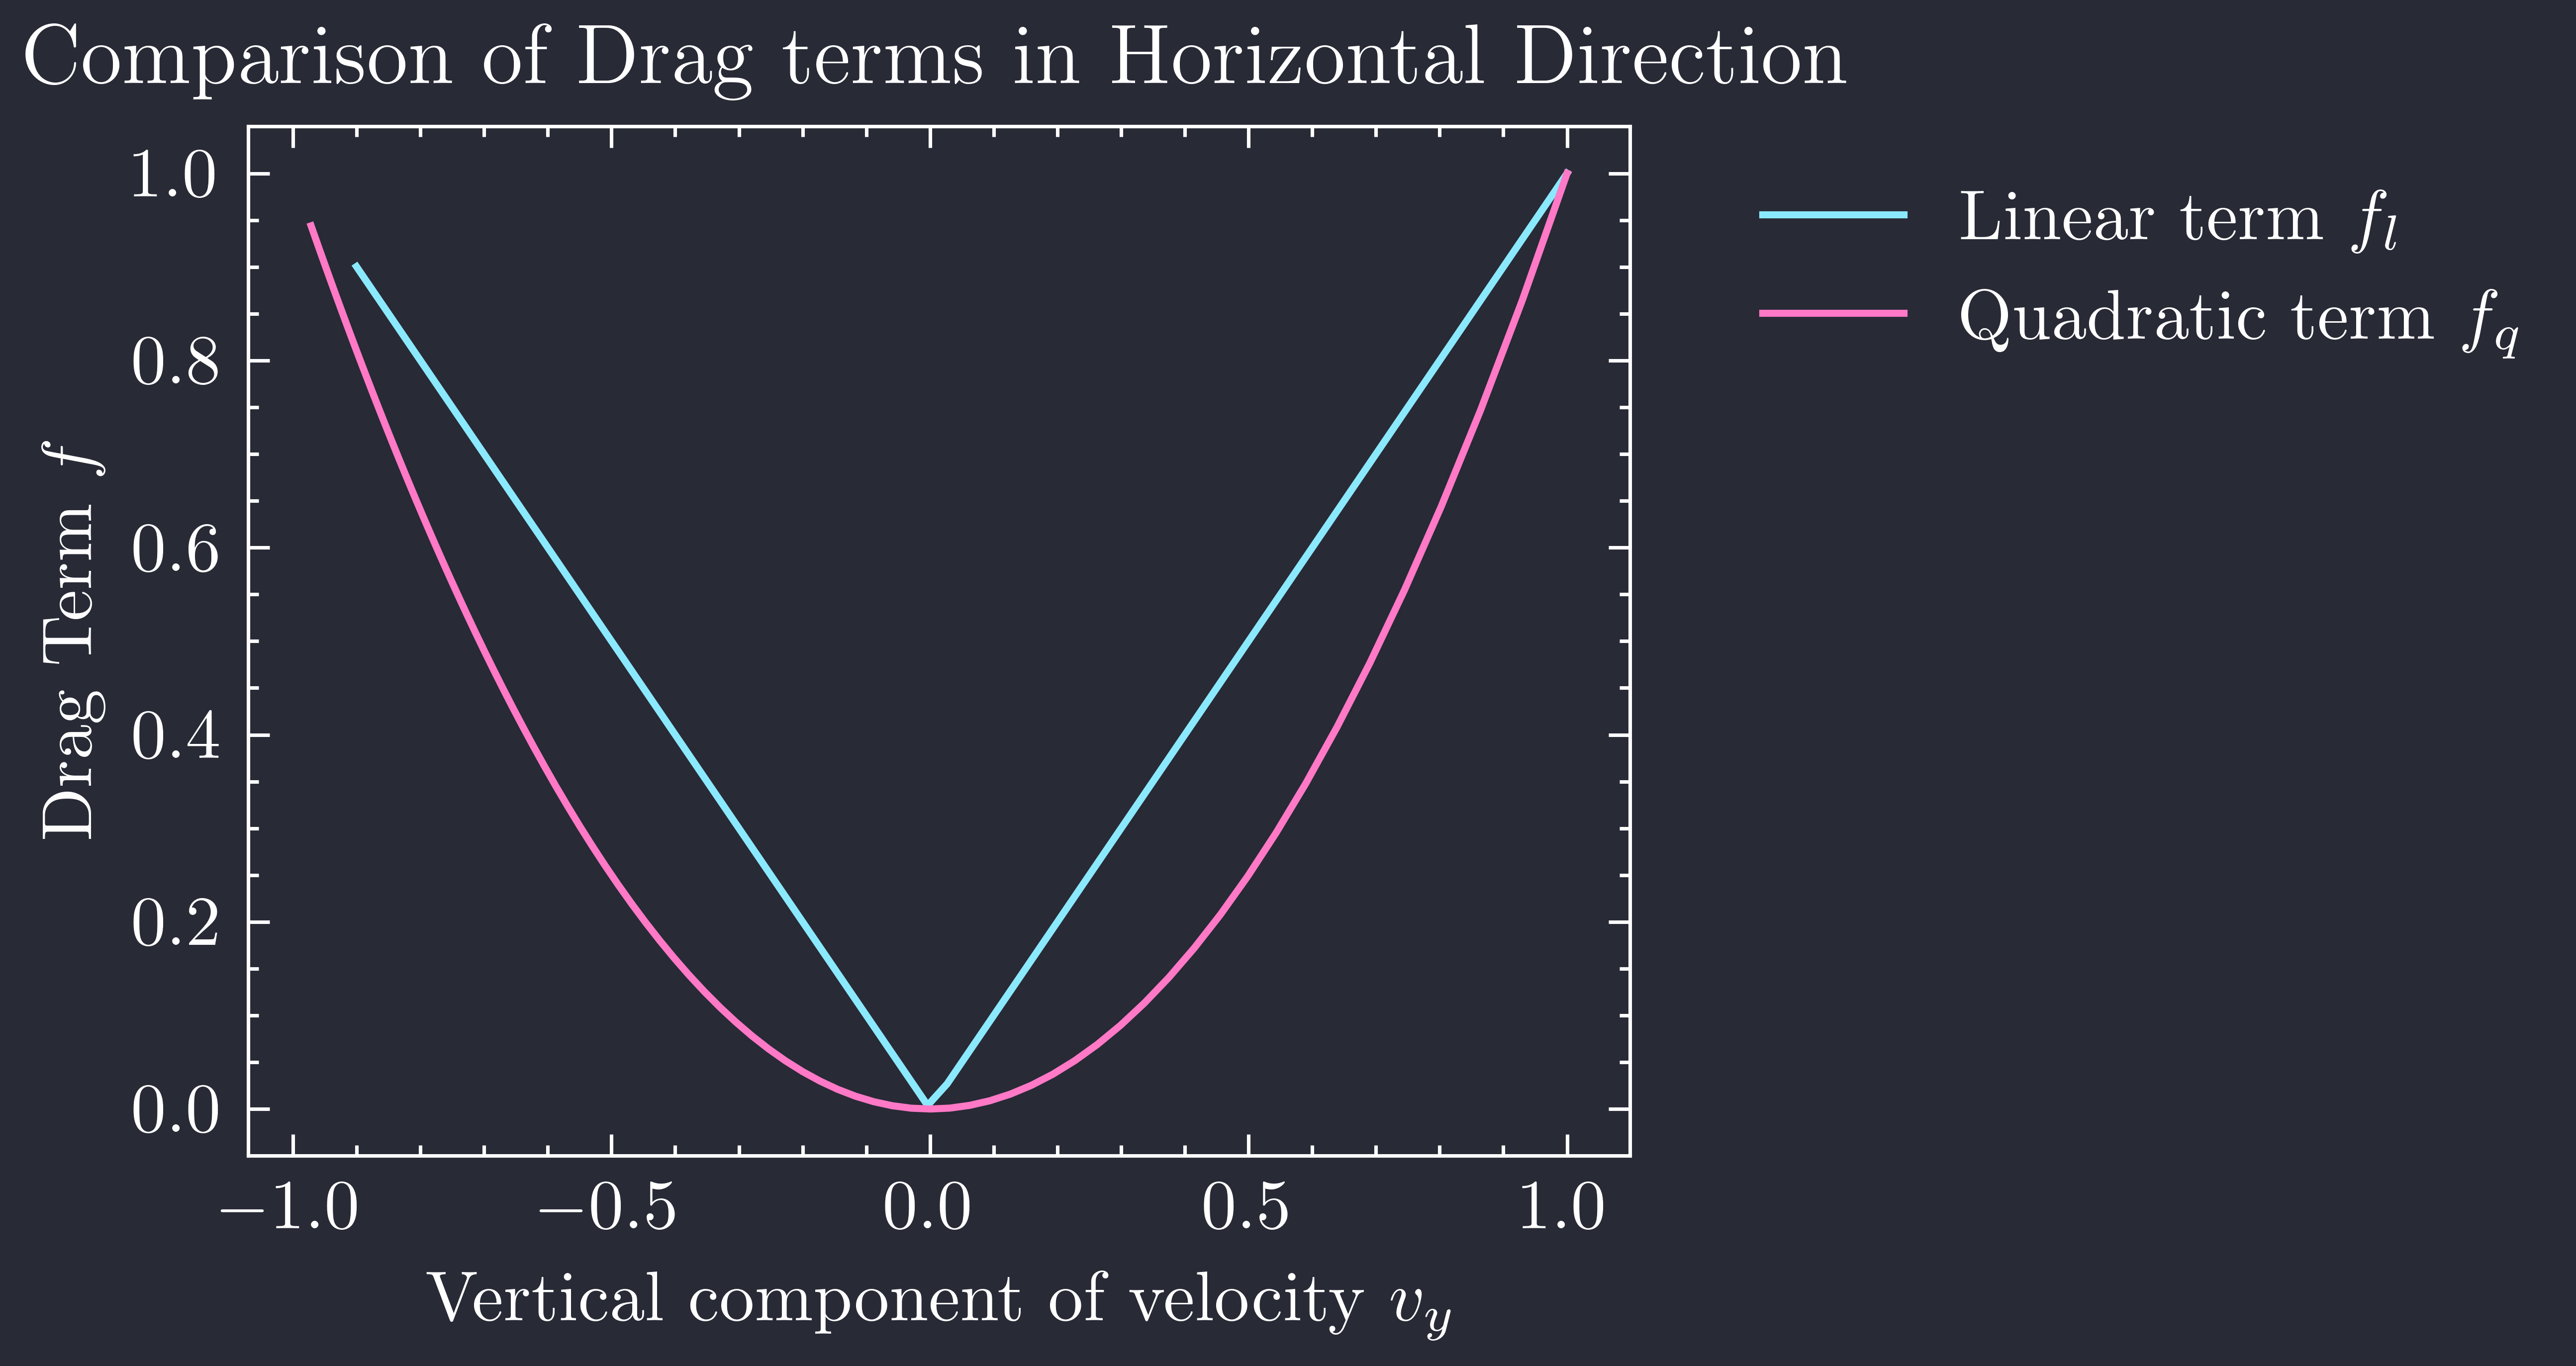

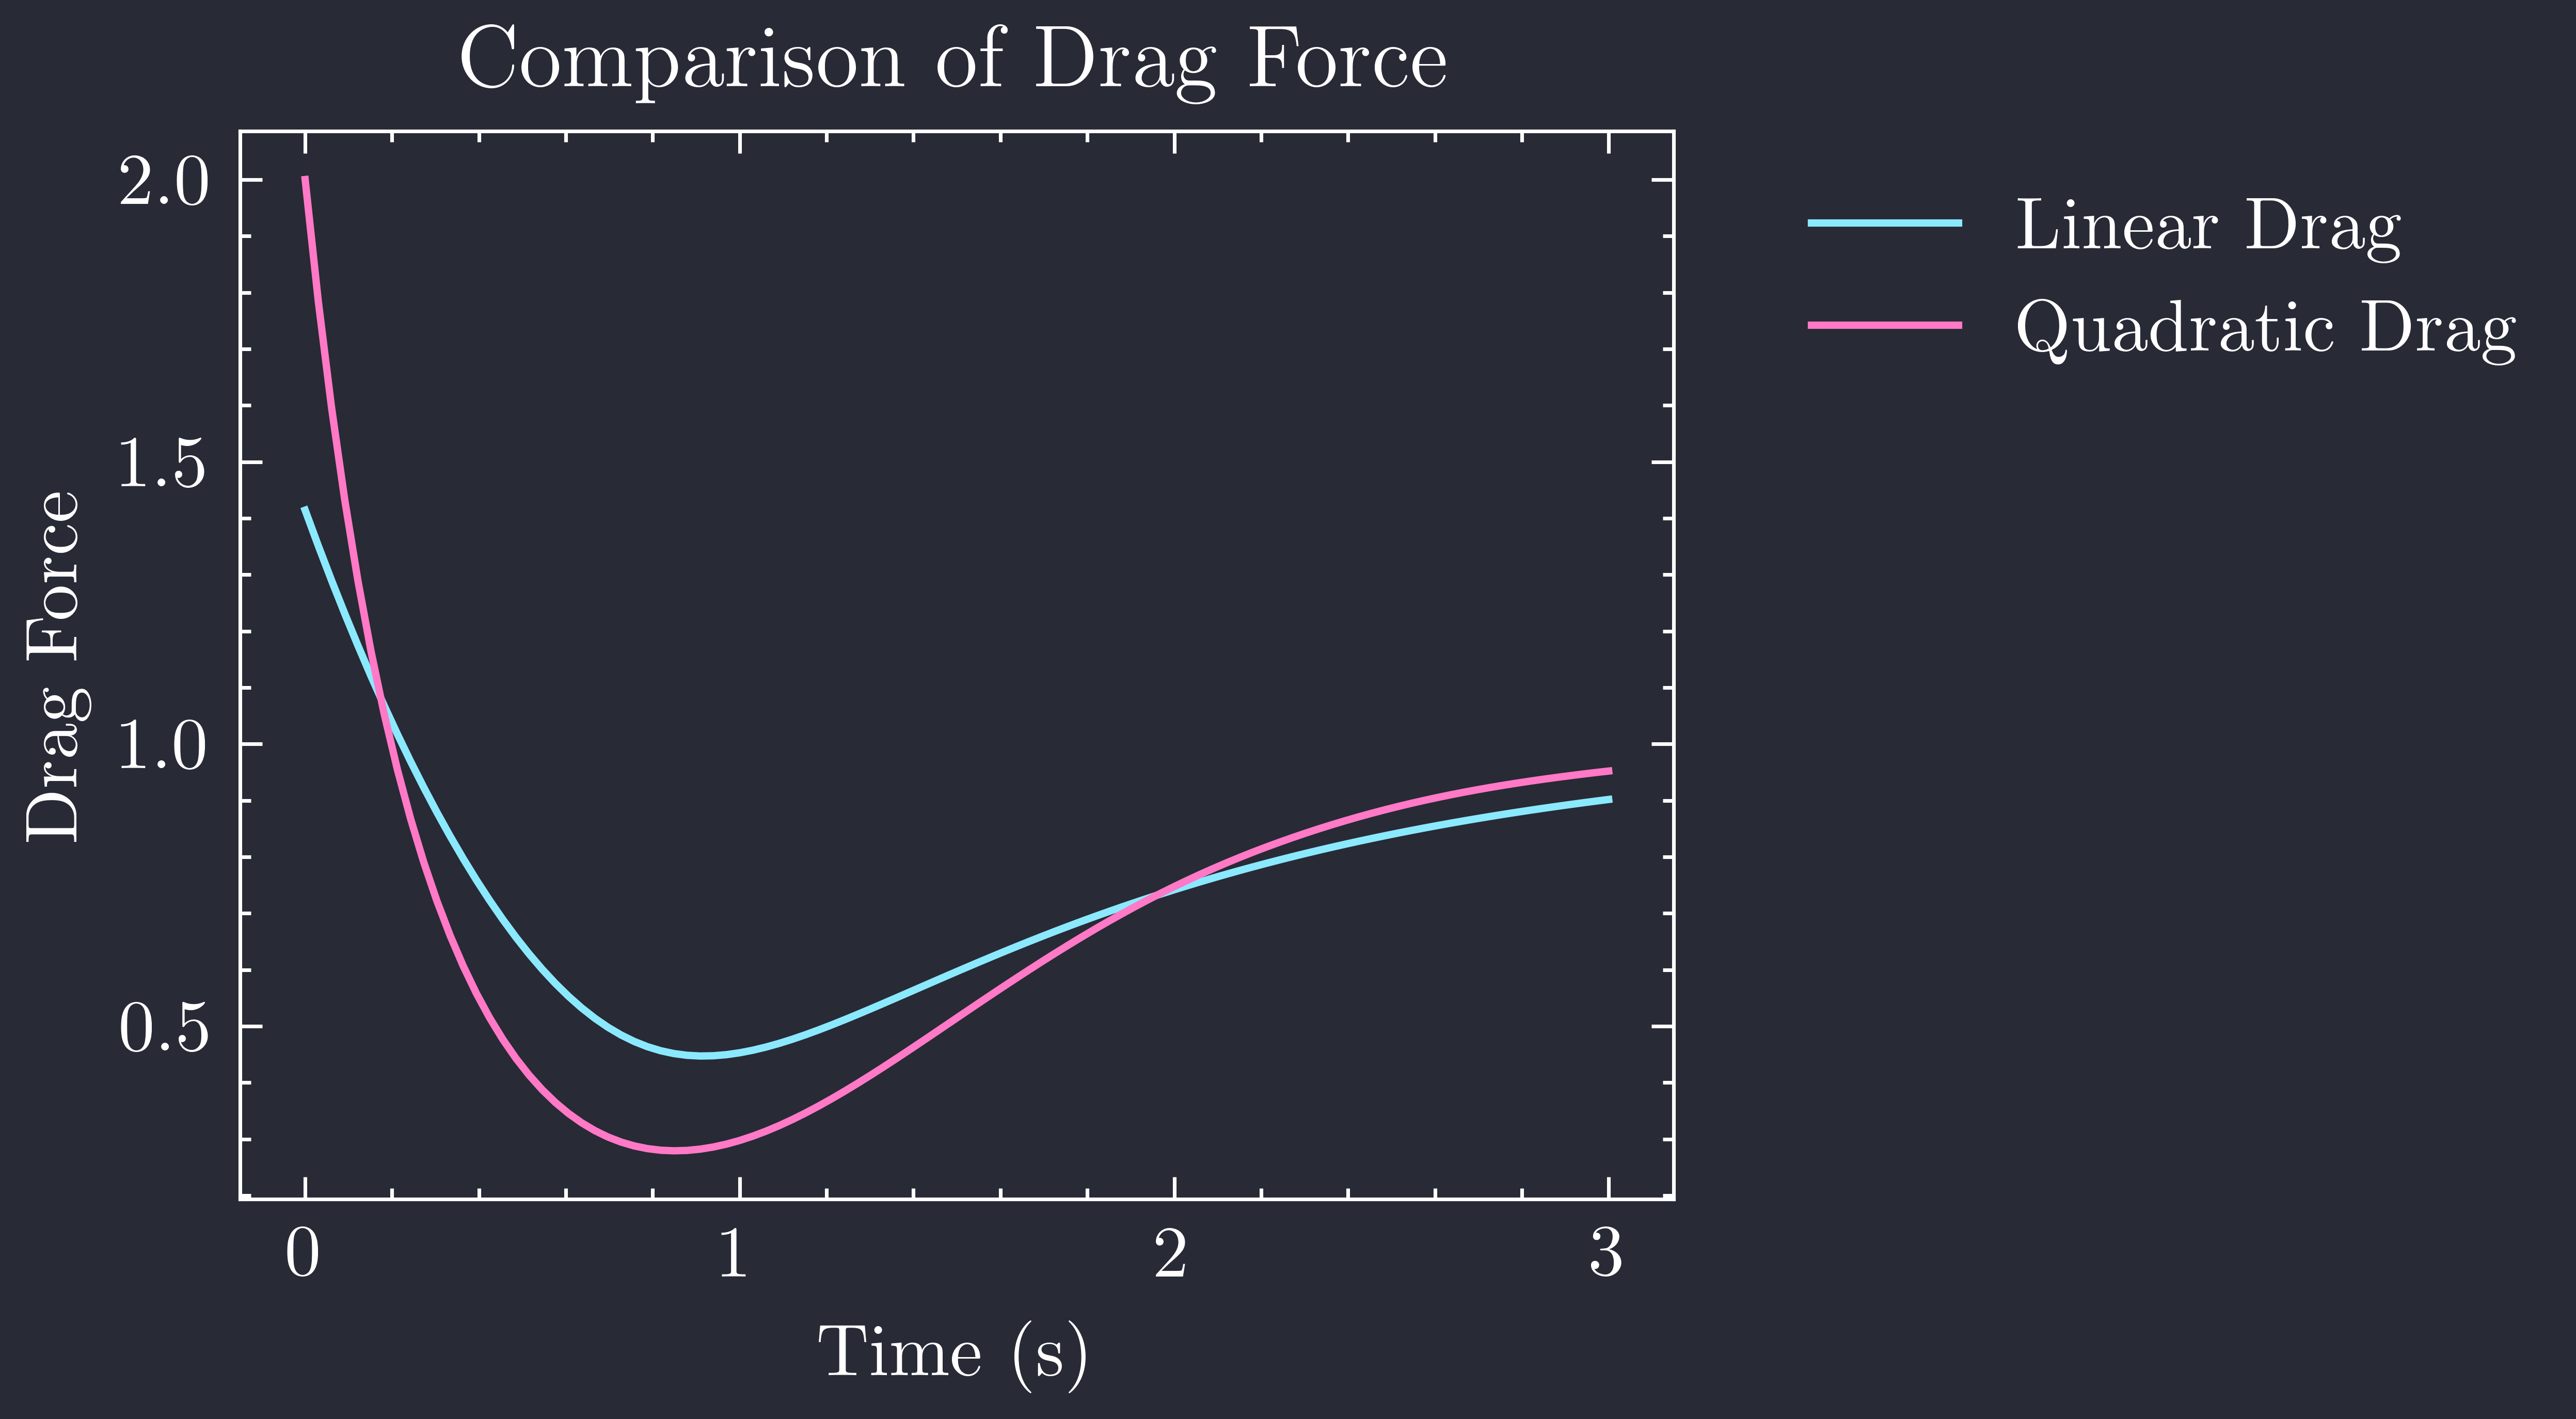

In [271]:
# magnitude of y velocity
v_l = sol_2_l.y[3]
v_q= sol_2_q.y[3]
f_l = np.abs(v_l)
f_q = np.abs(v_q) ** 2

# plot
plt.plot(v_l, f_l, label='Linear term $f_l$')
plt.plot(v_q, f_q, label='Quadratic term $f_q$')
plt.xlabel('Vertical component of velocity $v_y$')
plt.ylabel('Drag Term $f$')
plt.title('Comparison of Drag terms in Horizontal Direction')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# magnitude of drag force
force_l = np.sqrt(sol_2_l.y[2] ** 2 + sol_2_l.y[3] ** 2)
force_q = np.sqrt(sol_2_q.y[2] ** 2 + sol_2_q.y[3] ** 2) ** 2

# plot
plt.plot(sol_2_l.t, force_l, label='Linear Drag')
plt.plot(sol_2_q.t, force_q, label='Quadratic Drag')
plt.xlabel('Time (s)')
plt.ylabel('Drag Force')
plt.title('Comparison of Drag Force')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()